In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pickle
import requests
import json
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from flask import Flask, request, jsonify
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# EDA

In [2]:
def eda(df):
    print(df.head(2),'\n')
    print(df.info())
    print(df.describe(),'\n')
    print(df.isna().sum())
    print('Number of data point is: ', len(df))

def box_plot(df, feature):
   df.plot(y = feature, kind = 'box')

def heat_map(df):
    sns.heatmap(df.corr(),annot=True)
    
def check_vif(df,features):
    df = df.drop(features,axis = 1)
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    print(vif_data)

In [3]:
df = pd.DataFrame(pd.read_csv('ds_salaries.csv'))
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
le = LabelEncoder()
df['salary_currency'] = le.fit_transform(df['salary_currency'])
df['employee_residence'] = le.fit_transform(df['employee_residence'])
df['company_location'] = le.fit_transform(df['company_location'])
df['company_size'] = le.fit_transform(df['company_size'])
df['experience_level'] = le.fit_transform(df['experience_level'])
df['job_title'] = le.fit_transform(df['job_title'])

In [5]:
df['employment_type'] = le.fit_transform(df['employment_type'])
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,2,2,22,70000,7,79833,14,0,12,0
1,1,2020,3,2,41,260000,16,260000,32,0,29,2
2,2,2020,3,2,7,85000,8,109024,20,50,18,1
3,3,2020,2,2,47,20000,16,20000,23,0,20,2
4,4,2020,3,2,38,150000,16,150000,55,50,48,0


   Unnamed: 0  work_year  experience_level  employment_type  job_title  \
0           0       2020                 2                2         22   
1           1       2020                 3                2         41   

   salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  \
0   70000                7          79833                  14             0   
1  260000               16         260000                  32             0   

   company_location  company_size  
0                12             0  
1                29             2   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          607 non-null    int64
 1   work_year           607 non-null    int64
 2   experience_level    607 non-null    int32
 3   employment_type     607 non-null    int32
 4   job_title           607 non-null    i

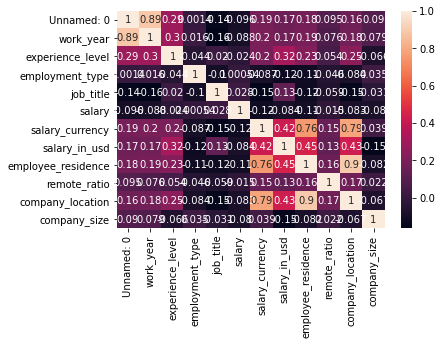

In [6]:
eda(df)
heat_map(df)
check_vif(df,['work_year','company_location','salary_currency'])

# Data splitting

In [15]:
#df = df.drop(['work_year','company_location','salary_currency','salary'],axis = 1)
X = df.loc[:, df.columns != 'salary_in_usd']
X = X.drop(['Unnamed: 0','work_year','salary','salary_currency','company_location'],axis = 1)
y = df['salary_in_usd']


In [16]:
X.head()

,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_size
0,2,2,22,14,0,0
1,3,2,41,32,0,2
2,3,2,7,20,50,1
3,2,2,47,23,0,2
4,3,2,38,55,50,0


# Modeling

### lienar regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
mean_squared_error(y_test,y_pred)

3043346288.765719

### polynomial regression

In [22]:
# poly = PolynomialFeatures(degree=4)
# X_poly = poly.fit_transform(X)
# poly.fit(X_poly,y)
# lin = LinearRegression()
# lin.fit(X_poly, y)


LinearRegression()

# HTML part

In [27]:
pickle.dump(lm, open('model.pkl','wb'))
heroku_app = Flask(__name__)
model = pickle.load(open('model.pkl','rb'))

@flask_app.route('/')
def home():
    return render_template('heroku_app.html')

@flask_app.route('/',methods = ['POST'])
def predict():
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    return render_template('heroku_app.html',prediction_text = 'The salary will be $ {}'.format(prediction))

if __name__ == '__main__':
    flask_app.run(port=5000,debug = True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\Users\shuny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
